In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#loading the datasets
df_cus=pd.read_csv('QVI_purchase_behaviour.csv')
df_tran=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
df_cus.shape

(72637, 3)

In [4]:
df_tran.shape

(264836, 8)

In [5]:
df_cus.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df_tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
df_cus.isnull().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [8]:
df_cus.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [9]:
df_tran.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [10]:
df_tran.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

It can be seen that our data does not have any missing value or incorrect data type so we can safely proceed further

In [11]:
df_tran=df_tran[df_tran['LYLTY_CARD_NBR'].isin(df_cus['LYLTY_CARD_NBR'].tolist())]
print(df_tran.shape)

(264836, 8)


Looks like transaction history has many transactions data from same person.

In [12]:
df_tran['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

It can be seen that same brand manufacture several products. So brand name can be seperated out as a seperate feature. Also the product name contains some more interesting and useful information like the packet size as well as flavors present. So all these things can be made seperate features. Afterwards we will also look how useful these new features prove to be.

In [13]:
# Merging the customer and transaction datasets
df=df_cus.merge(df_tran, on="LYLTY_CARD_NBR", how = 'inner')
print(df.shape)
df.head()

(264836, 10)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


Before proceeding further, we will make some assumptions out of what we have seen till now:
- LYLTY_CARD_NBR should have impact on total sales since it is representative of the individual customer and some customers will regularly buy more things than others.
- Lifestage should impact total sales, in a way that at some lifestage customers may tend to expend more. We will make further analysis of people in which lifestage are spending more.
- Customer type should affect the total sales as it represents their bying habit such as if they are focused on quality or not, or do they just buy things at the lowest prices. For ex. in our dataset, premium customers are those who have high spending budget and keeps quality of product above anything else while the budget customers would go for the cheapest option.
- Date will not directly impact the total sales, but we may see any trend that maybe on some day sales are more. If increasing dates increase or decrease sales, it can be of some use otherwise not. So we should check for that.
- STORE_NBR will have impact and would be important for total sales prediction because some stores maybe selling more than others.
- TXN_ID will not effect the sales as it's value keeps changing for each transaction.
- PROD_NBR should effect the sales as some product would be more preffered than others.
- prod_name can't have any direct impact but it is a potential driver of many other features, so rather than using it directly new features will be made out of those.
- PROD_QTY should impact the sales in the way that selling more quantity means more sales.

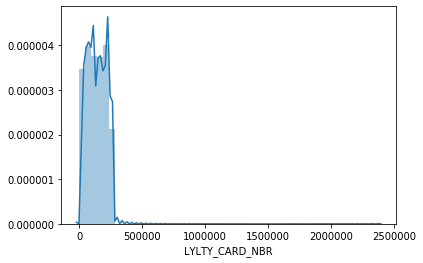

In [14]:
sns.distplot(df['LYLTY_CARD_NBR'])

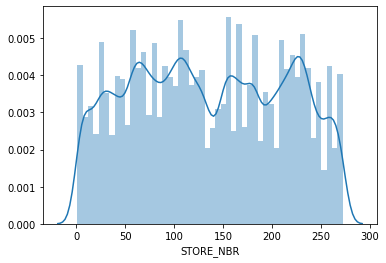

In [15]:
sns.distplot(df['STORE_NBR'])

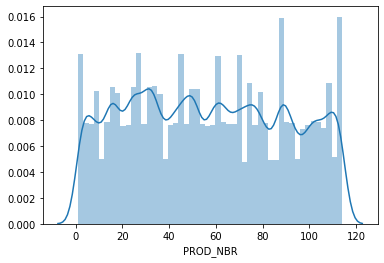

In [16]:
sns.distplot(df['PROD_NBR'])

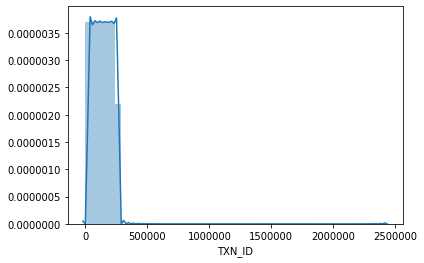

In [17]:
sns.distplot(df['TXN_ID'])

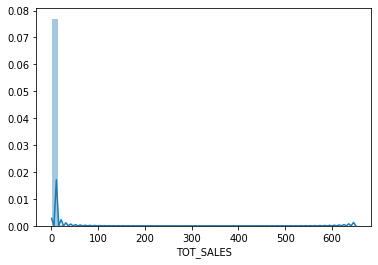

In [18]:
# Histogram of total sales
sns.distplot(df['TOT_SALES'])

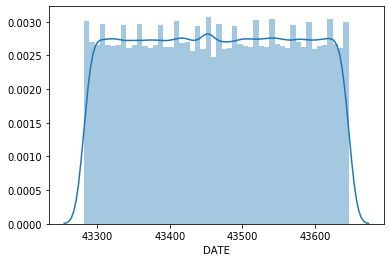

In [19]:
sns.distplot(df['DATE'])

From the distribution curves we can say that 'date', 'store_nbr', 'prod_nbr' has nearly normal distribution, while rest of the 3 does not mainly due to the presence of outliers and total sales is skewed towards left. 

From here we can decide some of our further steps such as we will remove the outliers and make the distribution nearly normal.

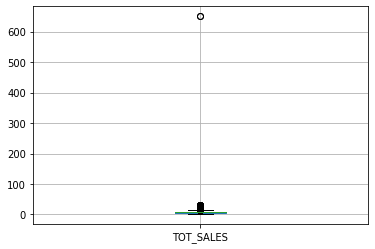

In [20]:
df.boxplot(column=['TOT_SALES'])

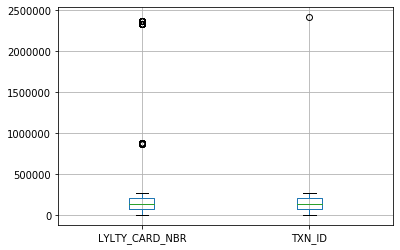

In [21]:
# Both the box plots are same
df.boxplot(column=['LYLTY_CARD_NBR','TXN_ID'])

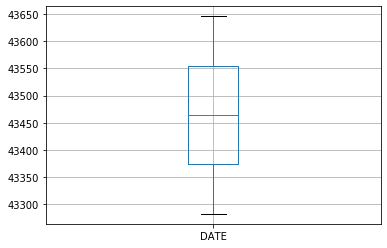

In [22]:
df.boxplot(column=['DATE'])

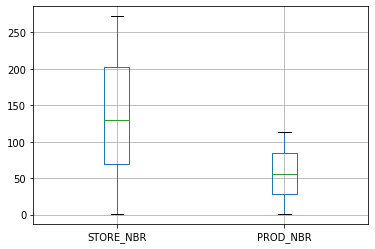

In [23]:
df.boxplot(column=['STORE_NBR','PROD_NBR'])

It again became evident again that 'LYLTY_CARD_NBR', 'TXN_ID', 'TOT_SALES' has outliers and others do not, but we will remove outliers from 2 of them not from total sales.

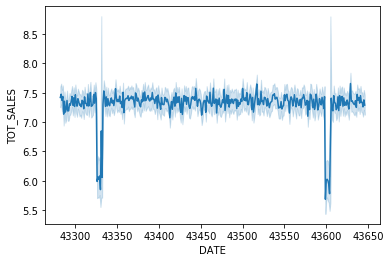

In [24]:
sns.lineplot(data=df, x="DATE", y="TOT_SALES")

We can see some big noticeable drops in total sales for some of the dates. 

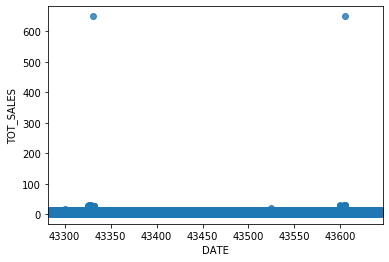

In [25]:
sns.regplot(data=df,y='TOT_SALES',x='DATE')

We can see that increasing of date does not effect total sales, so now we can drop it from further analysis.

- Next we will see which different customers buy frequently and which products are bought frequently. 
- We will see which customers and products are main drivers of sales. 
- We will see which different stores give high sales
- We will also see customers tend to buy how many packets together.

In [26]:
df.describe(include='O')

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME
count,264836,264836,264836
unique,7,3,114
top,OLDER SINGLES/COUPLES,Mainstream,Kettle Mozzarella Basil & Pesto 175g
freq,54479,101988,3304


- We can see that OLDER SINGLES/COUPLES are the most frequent buyers
- Mainstream customers are the most frequent buyers.
- Kettle Mozzarella Basil & Pesto 175g is the most bought product.

In [27]:
df_pivots=df[['LYLTY_CARD_NBR','PROD_NBR','STORE_NBR','PROD_QTY','PREMIUM_CUSTOMER','LIFESTAGE','PROD_NAME','TOT_SALES']]
for i in df_pivots.columns:
    print(pd.pivot_table(df_pivots,index=i,values='TOT_SALES').sort_values('TOT_SALES',ascending=False))

                TOT_SALES
LYLTY_CARD_NBR           
226000              650.0
44350                29.5
154199               28.5
66014                28.5
60198                27.0
...                   ...
124335                1.5
254215                1.5
35191                 1.5
265111                1.5
163195                1.5

[72637 rows x 1 columns]
          TOT_SALES
PROD_NBR           
4         12.669388
14        11.248871
20        10.940564
7         10.917441
23        10.891362
...             ...
72         3.214326
95         3.212430
92         3.205317
35         2.840040
76         2.832168

[114 rows x 1 columns]
           TOT_SALES
STORE_NBR           
226         9.349876
92          9.200000
96          8.862020
174         8.837452
246         8.834125
...              ...
266         3.653459
117         3.517391
99          3.467188
11          3.350000
211         2.600000

[272 rows x 1 columns]
           TOT_SALES
PROD_QTY            
200       650

ValueError: Grouper for 'TOT_SALES' not 1-dimensional

We observe from the above tables that(not mentioning outliers):
- person with LYLTY_CARD_NBR 226000 has spent most. Other higher spending people can also be seen
- product with PROD_NBR 4 gives the most sell.
- store with STORE_NBR 226 makes highest sell
- Mainstream customers are most frequent buyers and also highest sales comes from them
- OLDER SINGLES/COUPLES are most frequent and also highest sales comes from them
- Dorito Corn Chip Supreme 380g although not very frequently bought gives the most sell.
- Even though less people buy chips in more quantity still the higher the number of packets bought more is the sales.

For further analysis we can look at the sales for the combinations of customer details and product details.

In [28]:
pd.crosstab(df['LIFESTAGE'],df['PREMIUM_CUSTOMER'])

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,5020,11874,8216
NEW FAMILIES,3005,2325,1589
OLDER FAMILIES,23160,14244,11192
OLDER SINGLES/COUPLES,18407,18318,17754
RETIREES,15201,21466,13096
YOUNG FAMILIES,19122,12907,11563
YOUNG SINGLES/COUPLES,9242,20854,6281


We can see that mostly Mainstream customers are RETIREES. We know that mainstream customers give most of the sales, so retirees are potential customers for increasing sales.

In [29]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,43464.036260,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,105.389282,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,43282.000000,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,43464.000000,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,43555.000000,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [30]:
# Removing the 2 outliers having extreme values
df=df[df['TOT_SALES']<50]

In [31]:
# Making list of the new feature packet_size
x=[df['PROD_NAME'][i][len(df['PROD_NAME'][i])-4:-1] for i in range(221625)]

In [32]:
y=[]
c=0
for a in x:
    try:
        a=int(a)
        y.append(a)
    except:
        y.append(0)
        c+=1
c

2730

In [33]:
len(y)

221625

In [34]:
pck_size=pd.DataFrame(y)

In [35]:
# Defining a new feature packet_size
df=df[:221625]
df['pck_size']=pck_size

In [36]:
print(df['pck_size'].value_counts())
print(df['PROD_QTY'].value_counts())

175    55453
150    36167
134    20991
110    18725
170    16670
165    12882
300    12618
330    10505
380     5322
210     5227
270     5198
200     3806
0       2730
250     2660
190     2564
90      2562
160     2492
220     1316
70      1262
180     1244
125     1231
Name: pck_size, dtype: int64
2    197547
1     23014
5       374
3       346
4       344
Name: PROD_QTY, dtype: int64


In [37]:
# Defining a new feature which shows the flavour of chips(salt)
df['salt']=df['PROD_NAME'].apply(lambda x:1 if 'salt' in x.lower() else 0)

In [38]:
df.salt.value_counts()

0    189422
1     32203
Name: salt, dtype: int64

In [39]:
# Defining a new feature which shows the flavour of chips(cream)
df['cream']=df['PROD_NAME'].apply(lambda x:1 if 'cream' in x.lower() else 0)

In [40]:
df.cream.value_counts()

0    202205
1     19420
Name: cream, dtype: int64

In [41]:
# Defining a new feature which shows the flavour of chips(cheese)
df['cheese']=df['PROD_NAME'].apply(lambda x:1 if 'cheese' in x.lower() else 0)

In [42]:
df.cheese.value_counts()

0    198241
1     23384
Name: cheese, dtype: int64

In [43]:
df.PROD_NAME.value_counts()

Cobs Popd Sea Salt  Chips 110g              2742
Tyrrells Crisps     Ched & Chives 165g      2736
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2734
Kettle 135g Swt Pot Sea Salt                2730
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    2720
                                            ... 
French Fries Potato Chips 175g              1200
RRD Pc Sea Salt     165g                    1195
Woolworths Medium   Salsa 300g              1190
WW Crinkle Cut      Original 175g           1177
NCC Sour Cream &    Garden Chives 175g      1168
Name: PROD_NAME, Length: 114, dtype: int64

In [44]:
# Defining a new feature, the first name of the brands of the chips
z=[k.split()[0] for k in df.PROD_NAME]
df['brand_nme']=z
df.head(60)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pck_size,salt,cream,cheese,brand_nme
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1,0,0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,0,0,0,Red
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,0,1,0,Grain
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,0,0,0,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,0,0,0,WW
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,43462,1,6,86,Cheetos Puffs 165g,1,2.8,165,0,0,0,Cheetos
6,1007,YOUNG SINGLES/COUPLES,Budget,43438,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,0,1,0,Infuzions
7,1007,YOUNG SINGLES/COUPLES,Budget,43439,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,0,0,0,RRD
8,1009,NEW FAMILIES,Premium,43424,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,0,0,1,Doritos
9,1010,YOUNG SINGLES/COUPLES,Mainstream,43352,1,10,51,Doritos Mexicana 170g,2,8.8,170,0,0,0,Doritos


In [45]:
df.brand_nme.value_counts()

Kettle        34405
Smiths        24302
Pringles      20991
Doritos       20794
Thins         11661
RRD           10044
Infuzions      9249
WW             8723
Cobs           8091
Twisties       7858
Tostitos       7854
Old            7728
Tyrrells       5372
Grain          5227
Natural        5082
Red            5002
Cheezels       3872
CCs            3869
Woolworths     3745
Infzns         2647
Dorito         2625
Smith          2499
Cheetos        2495
Snbts          1350
Burger         1316
GrnWves        1244
Sunbites       1212
French         1200
NCC            1168
Name: brand_nme, dtype: int64

In [46]:
print(df.STORE_NBR.value_counts())
print(df.PROD_NBR.value_counts())

88     1861
93     1832
165    1819
43     1771
40     1764
       ... 
31        2
211       2
11        2
92        1
76        1
Name: STORE_NBR, Length: 225, dtype: int64
75     2742
112    2736
108    2734
63     2730
33     2720
       ... 
29     1200
11     1195
76     1190
72     1177
98     1168
Name: PROD_NBR, Length: 114, dtype: int64


In [47]:
df['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     45904
RETIREES                  41319
OLDER FAMILIES            41059
YOUNG FAMILIES            36687
YOUNG SINGLES/COUPLES     29936
MIDAGE SINGLES/COUPLES    20929
NEW FAMILIES               5791
Name: LIFESTAGE, dtype: int64

### Continuous variables analysis

### Visualizing continuous variables

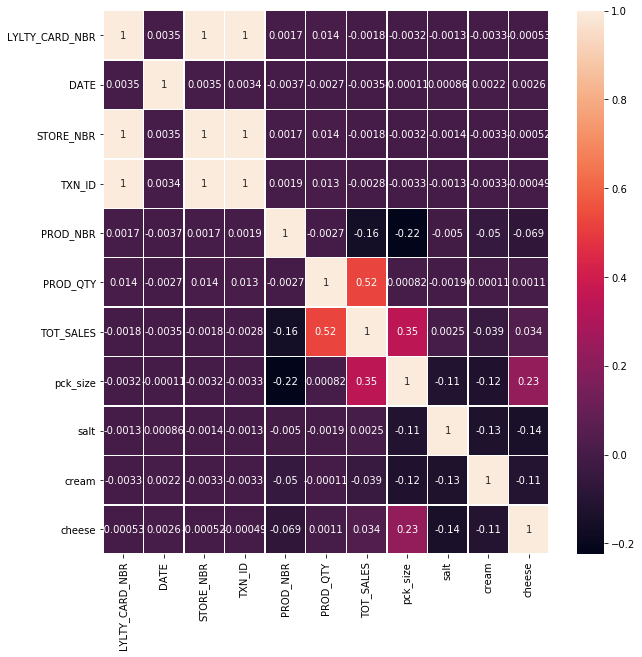

In [60]:
# Correlation between numerical variables
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,linewidths=.5, ax=ax)

### Visualizing categorical variable

In [49]:
df_cat=df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','brand_nme','PROD_NBR','STORE_NBR','DATE','pck_size','salt', 'cream', 'cheese']]

graph for LIFESTAGE: total=7


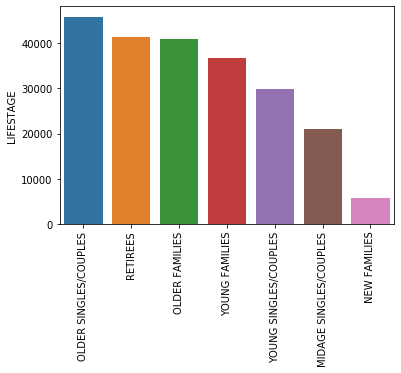

graph for PREMIUM_CUSTOMER: total=3


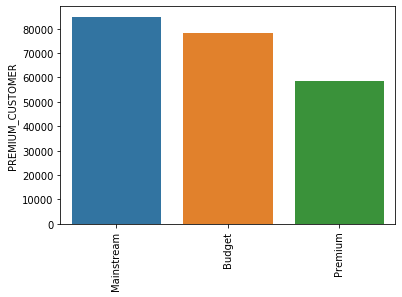

graph for PROD_QTY: total=5


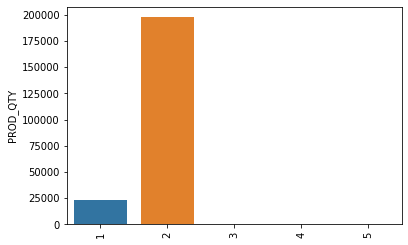

graph for brand_nme: total=29


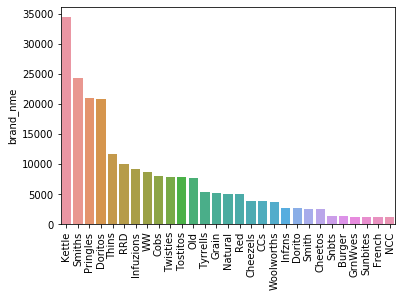

graph for PROD_NBR: total=30


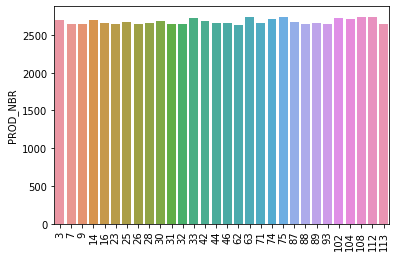

graph for STORE_NBR: total=30


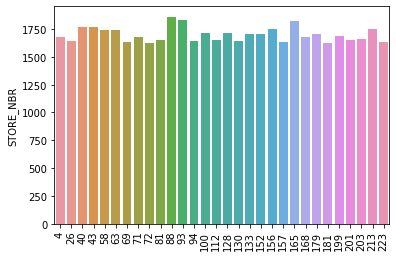

graph for DATE: total=30


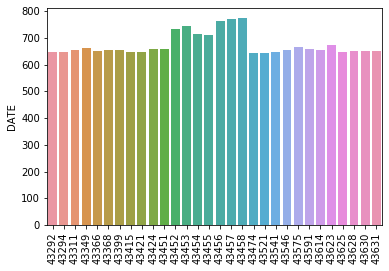

graph for pck_size: total=21


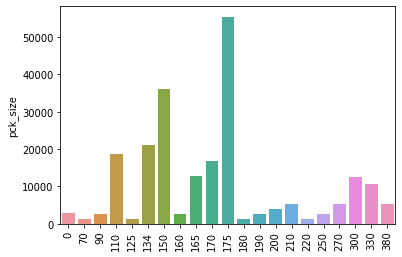

graph for salt: total=2


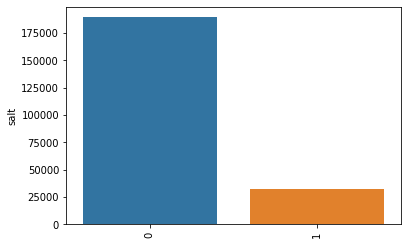

graph for cream: total=2


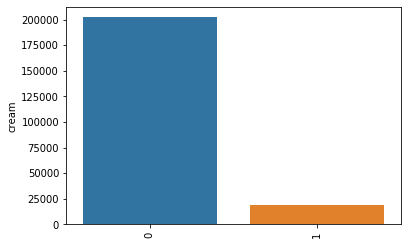

graph for cheese: total=2


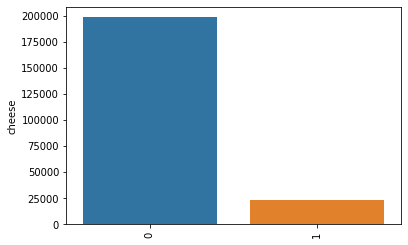

In [50]:
# Bar plots of categorical variables
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()[:30]
    print('graph for %s: total=%d'%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [51]:
# Pivot table showing total sales distribution with respect to brand and pack size
pd.pivot_table(df,index=['brand_nme','pck_size'],values='TOT_SALES').sort_values('TOT_SALES',ascending=False)

,,TOT_SALES
brand_nme,pck_size,
Dorito,380,12.239810
Smiths,380,11.235595
Doritos,330,10.935969
Cheezels,330,10.884173
Smiths,330,10.882501
Kettle,175,10.329145
Old,300,9.738703
Kettle,150,8.803814
Twisties,270,8.803540


In [52]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'pck_size',
       'salt', 'cream', 'cheese', 'brand_nme'],
      dtype='object')

In [53]:
# Pivot table for various categorical variables
df_pivot=df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','pck_size','salt', 'cream', 'cheese', 'brand_nme','TOT_SALES']]

In [54]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values='TOT_SALES').sort_values('TOT_SALES',ascending=False))

LIFESTAGE
                        TOT_SALES
LIFESTAGE                        
OLDER SINGLES/COUPLES    7.364477
RETIREES                 7.360955
MIDAGE SINGLES/COUPLES   7.359246
NEW FAMILIES             7.275013
YOUNG FAMILIES           7.245092
OLDER FAMILIES           7.229897
YOUNG SINGLES/COUPLES    7.138911
PREMIUM_CUSTOMER
                  TOT_SALES
PREMIUM_CUSTOMER           
Mainstream         7.346203
Premium            7.255601
Budget             7.242858
PROD_QTY
          TOT_SALES
PROD_QTY           
5         18.215642
4         14.968023
3         11.516185
2          7.658299
1          3.732543
pck_size
          TOT_SALES
pck_size           
380       11.730909
330       10.895926
270        8.803540
250        8.221729
0          8.030769
300        7.465256
170        7.329934
175        7.299322
110        7.264545
134        7.071264
150        7.039074
210        6.869409
165        6.618460
180        5.848633
190        4.839665
70         4.533756
220      

ValueError: Grouper for 'TOT_SALES' not 1-dimensional

In [55]:
pd.pivot_table(df_pivot,index='LIFESTAGE',columns='cream',values='TOT_SALES')

cream,0,1
LIFESTAGE,,
MIDAGE SINGLES/COUPLES,7.403769,6.910741
NEW FAMILIES,7.294070,7.078947
OLDER FAMILIES,7.257150,6.947705
OLDER SINGLES/COUPLES,7.395416,7.040978
RETIREES,7.393327,7.021883
YOUNG FAMILIES,7.271482,6.968170
YOUNG SINGLES/COUPLES,7.169031,6.822376


In [56]:
df_model=df[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'STORE_NBR','PROD_NBR','PROD_QTY', 'TOT_SALES', 'pck_size',
             'salt', 'cream', 'cheese', 'brand_nme', 'DATE']]
df_clus=df[['STORE_NBR','PROD_NBR','PROD_QTY', 'TOT_SALES', 'pck_size',
       'salt', 'cream', 'cheese', 'DATE']]

In [57]:
df_dum=pd.get_dummies(df_model)
print(df_dum.shape)

(221625, 48)


In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=df_clus
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=2,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [65]:
import plotly.express as px
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(df_clus,columns=df_clus.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()